In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from MovementNN import MovementNN
from NNTrainer import NNTrainer

BATCH_SIZE = 128
GAMMA = 0.1
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4
n_hiddens_per_layer=[512, 256, 128]
num_episodes = 100

Complete


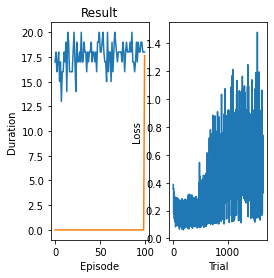

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [18]:
trainer = NNTrainer(
    batch_size=BATCH_SIZE,
    gamma=GAMMA,
    eps_start=EPS_START,
    eps_end=EPS_END,
    eps_decay=EPS_DECAY,
    tau=TAU,
    learning_rate=LR,
    n_hiddens_per_layer=n_hiddens_per_layer,
    num_episodes=num_episodes
)

file_path = "saved_model.pth"

if os.path.exists(file_path):
    trainer.load_model(file_path)

trainer.train()

trainer.save_model(file_path)

Complete


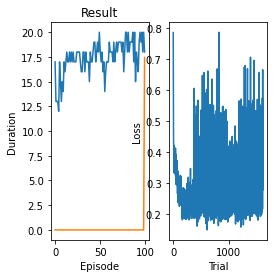

<Figure size 432x288 with 0 Axes>

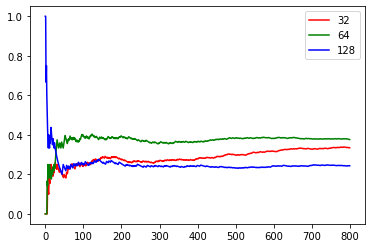

In [27]:
'''Batch size: This is the number of samples used in each training iteration.
A larger batch size can lead to more stable training, but may require more memory
and computational resources. A smaller batch size can lead to more noise in the
training process, but can be trained with less memory and computational resources.
A common batch size for DQNs is around 32-128, so your choice of 128 seems reasonable.'''
batch_list = [32, 64, 128]

batch_correctness_traces = [] 

for batch in batch_list:
    
    trainer = NNTrainer(
        batch_size=batch,
        gamma=GAMMA,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        tau=TAU,
        learning_rate=LR,
        n_hiddens_per_layer=n_hiddens_per_layer,
        num_episodes=num_episodes
    )
    
    trainer.train()
    
    for i in range(800):
        trainer.use()
    
    batch_correctness_traces.append(trainer.correctness_trace)
    
# Plot each line with a different color
plt.plot(batch_correctness_traces[0], 'r', label='32') 
plt.plot(batch_correctness_traces[1], 'g', label='64')  
plt.plot(batch_correctness_traces[2], 'b', label='128')  

# Add a legend and show the plot
plt.legend()
plt.show()

Complete


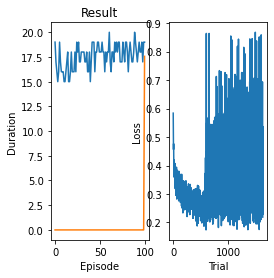

<Figure size 432x288 with 0 Axes>

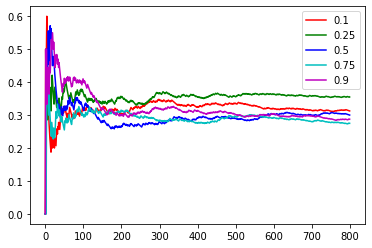

In [28]:
'''Gamma: This is the discount factor used in the Q-learning update.
A higher gamma value will prioritize long-term rewards over immediate rewards,
while a lower gamma value will prioritize immediate rewards. The choice of gamma
can depend on the specifics of your problem, but a value of 0.99 is commonly used.'''

gamma_list = [0.1, 0.25, 0.5, 0.75, 0.9]

gamma_correctness_traces = [] 

for gamma in gamma_list:
    
    trainer = NNTrainer(
        batch_size=BATCH_SIZE,
        gamma=gamma,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        tau=TAU,
        learning_rate=LR,
        n_hiddens_per_layer=n_hiddens_per_layer,
        num_episodes=num_episodes
    )
    
    trainer.train()
    
    for i in range(800):
        trainer.use()
    
    gamma_correctness_traces.append(trainer.correctness_trace)
    
# Plot each line with a different color
plt.plot(gamma_correctness_traces[0], 'r', label='0.1') 
plt.plot(gamma_correctness_traces[1], 'g', label='0.25')  
plt.plot(gamma_correctness_traces[2], 'b', label='0.5')  
plt.plot(gamma_correctness_traces[3], 'c', label='0.75')  
plt.plot(gamma_correctness_traces[4], 'm', label='0.9')  

# Add a legend and show the plot
plt.legend()
plt.show()

Complete


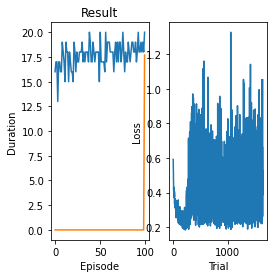

<Figure size 432x288 with 0 Axes>

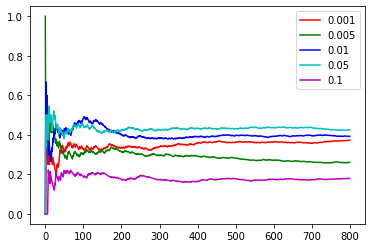

In [29]:
'''Tau: This is the soft update parameter used to update the target network.
A lower tau value will lead to more frequent updates of the target network, 
which can help stabilize training. A common value for tau is around 0.001-0.01,
so your choice of 0.005 seems reasonable.'''

tau_list = [0.001, 0.005, 0.01, 0.05, 0.1]

tau_correctness_traces = [] 

for tau in tau_list:
    
    trainer = NNTrainer(
        batch_size=BATCH_SIZE,
        gamma=GAMMA,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        tau=tau,
        learning_rate=LR,
        n_hiddens_per_layer=n_hiddens_per_layer,
        num_episodes=num_episodes
    )
    
    trainer.train()
    
    for i in range(800):
        trainer.use()
    
    tau_correctness_traces.append(trainer.correctness_trace)
    
# Plot each line with a different color
plt.plot(tau_correctness_traces[0], 'r', label='0.001') 
plt.plot(tau_correctness_traces[1], 'g', label='0.005')  
plt.plot(tau_correctness_traces[2], 'b', label='0.01')  
plt.plot(tau_correctness_traces[3], 'c', label='0.05')  
plt.plot(tau_correctness_traces[4], 'm', label='0.1')  

# Add a legend and show the plot
plt.legend()
plt.show()

Complete


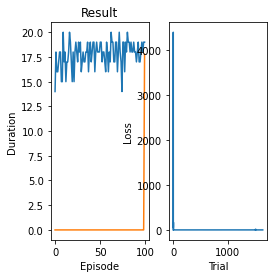

<Figure size 432x288 with 0 Axes>

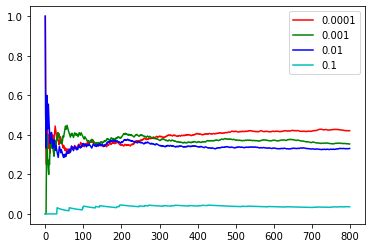

In [30]:
'''Learning rate: This is the rate at which the Q-network weights are updated during training.
A higher learning rate can lead to faster convergence, but may result in overshooting and instability.
A lower learning rate can lead to more stable training, but may take longer to converge.
Your choice of learning rate (1e-4) is commonly used for DQNs.'''

lr_list = [0.0001, 0.001, 0.01, 0.1]

lr_correctness_traces = [] 

for lr in lr_list:
    
    trainer = NNTrainer(
        batch_size=BATCH_SIZE,
        gamma=GAMMA,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        tau=TAU,
        learning_rate=lr,
        n_hiddens_per_layer=n_hiddens_per_layer,
        num_episodes=num_episodes
    )
    
    trainer.train()
    
    for i in range(800):
        trainer.use()
    
    lr_correctness_traces.append(trainer.correctness_trace)
    
# Plot each line with a different color
plt.plot(lr_correctness_traces[0], 'r', label='0.0001') 
plt.plot(lr_correctness_traces[1], 'g', label='0.001')  
plt.plot(lr_correctness_traces[2], 'b', label='0.01')  
plt.plot(lr_correctness_traces[3], 'c', label='0.1')  

# Add a legend and show the plot
plt.legend()
plt.show()

Complete


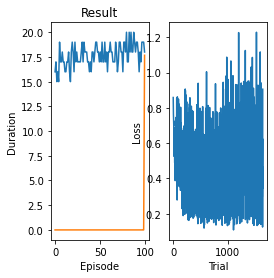

<Figure size 432x288 with 0 Axes>

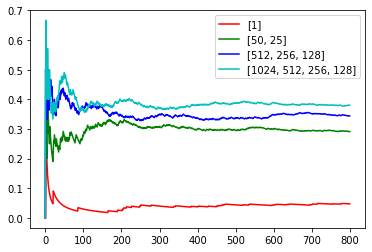

In [31]:
n_hiddens_per_layer_list = [[1], [50, 25], [512, 256, 128], [1024, 512, 256, 128]] 

n_hiddens_per_layer_correctness_traces = [] 

for n_hiddens_per_layer in n_hiddens_per_layer_list:
    
    trainer = NNTrainer(
        batch_size=BATCH_SIZE,
        gamma=GAMMA,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        tau=TAU,
        learning_rate=LR,
        n_hiddens_per_layer=n_hiddens_per_layer,
        num_episodes=num_episodes
    )
    
    trainer.train()
    
    for i in range(800):
        trainer.use()
    
    n_hiddens_per_layer_correctness_traces.append(trainer.correctness_trace)
    
# Plot each line with a different color
plt.plot(n_hiddens_per_layer_correctness_traces[0], 'r', label='[1]') 
plt.plot(n_hiddens_per_layer_correctness_traces[1], 'g', label='[50, 25]')  
plt.plot(n_hiddens_per_layer_correctness_traces[2], 'b', label='[512, 256, 128]')  
plt.plot(n_hiddens_per_layer_correctness_traces[3], 'c', label='[1024, 512, 256, 128]')  

# Add a legend and show the plot
plt.legend()
plt.show()

Complete


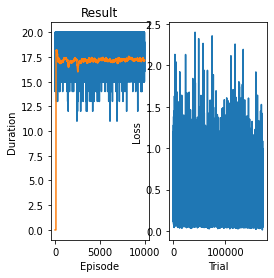

<Figure size 432x288 with 0 Axes>

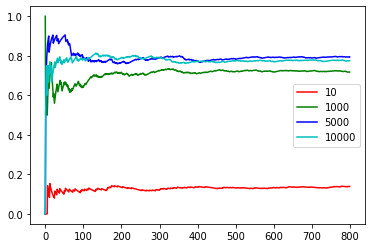

In [32]:
episodes_list = [10, 1000, 5000, 10000]

episodes_correctness_traces = [] 

for episodes in episodes_list:
    
    trainer = NNTrainer(
        batch_size=64,
        gamma=0.25,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        tau=0.05,
        learning_rate=0.001,
        n_hiddens_per_layer=[1024, 512, 256, 128],
        num_episodes=episodes
    )
    
    trainer.train()
    
    for i in range(800):
        trainer.use()
    
    episodes_correctness_traces.append(trainer.correctness_trace)
    
# Plot each line with a different color
plt.plot(episodes_correctness_traces[0], 'r', label='10') 
plt.plot(episodes_correctness_traces[1], 'g', label='1000')  
plt.plot(episodes_correctness_traces[2], 'b', label='5000')  
plt.plot(episodes_correctness_traces[3], 'c', label='10000')  

# Add a legend and show the plot
plt.legend()
plt.show()